# Мобильное приложение "Ненужные вещи": выделение групп пользователей на основе поведения

**Цель исследования**:

1. Провести исследовательский анализ пользовательского поведения в мобильном приложении сервиса «Ненужные вещи».
2. Выделить группы на основе пользовательских действий, рассчитать и проанализировать бизнес-показатели (retention rate, conversion в целевое действие contacts_show), проверить статистические гипотезы в отношении выделенных групп.
3. Сформулировать выводы и сделать базовые рекомендации по управлению вовлеченностью пользователей.

  **Ход исследования:**
    Данные я получу из файлов `/datasets/mobile_sources.csv`, `/datasets/mobile_dataset.csv'`. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.
    
    Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы и приступлю к проведению исследовательского анализа. Сегментирую пользователей на основе поведения, исследую показатели удержания и конверсии в целевое действие. Далее проверю гипотезы на двух группах, выделенных при сегментации: первая гипотеза о том, что конверсия в целевое действие у двух групп отличается, вторая гипотеза - имеется ли статистическая значимость в числе сессий между этими двумя группами.
    
    Таким образом, мое исследование пройдет в пять этапов:
    - Обзор и предобработка данных.
    - Исследовательский анализ пользовательского поведения в мобильном приложении сервиса «Ненужные вещи».
    - Сегментация пользователей по источнику, с которого установлено приложение. Выявление групп с лучшим показателем удержания пользователей и с большей конверсией в целевое действие.
    - Проверка статистических гипотез.
    - Выводы и базовые рекомендации.

In [ ]:
import pandas as pd
import datetime as dt
from datetime import time
from datetime import timedelta
#import numpy as np
from scipy import stats as st
import math as mth
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams, rcParamsDefault
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format='{:,.2f}'.format
rcParams['figure.figsize'] = 12, 8

## Обзор и предобработка данных

### Загрузка, первичный осмотр данных

In [ ]:
try:
    mobile_dataset, mobile_sources = (pd.read_csv('/datasets/mobile_dataset.csv'),
                                     pd.read_csv('/datasets/mobile_sources.csv'),
    )
except:
    mobile_dataset, mobile_sources = (pd.read_csv('https://code.s3.yandex.net//datasets/mobile_dataset.csv'),
                                     pd.read_csv('https://code.s3.yandex.net//datasets/mobile_sources.csv')
    )

In [ ]:
mobile_dataset.info()
mobile_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [ ]:
mobile_sources.info()
mobile_sources.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [ ]:
# проверим соответствие числа уникальных значений идентификаторов пользователей `mobile_dataset` и `mobile_sources`
mobile_dataset['user.id'].nunique(), mobile_sources['userId'].nunique()

(4293, 4293)

In [ ]:
# изучим период данных
mobile_dataset['event.time'].min(), mobile_dataset['event.time'].max()

('2019-10-07 00:00:00.431357', '2019-11-03 23:58:12.532487')

**Вывод по разделу "1.1 Загрузка, первичный осмотр данных":**

1. В полученных данных есть информация о 4293 пользователях приложения с указанием источника, с которых пользователи установили приложения и совершенных ими 74197 действиях с указанием даты и времени.
2. Действия были совершены за период с 07.10.2019 по 03.11.2019 года
3. Установлено несоответствие типов данных столбца `event.time`, поэтому в разделе 1.2 проекта приведем данные к нужному типу.

### Преобразование  типов данных

In [ ]:
# в столбце `event.time` с датой и временем установлен формат данных `object`, приведем даты к формату datetime
mobile_dataset['event.time']= pd.to_datetime(mobile_dataset['event.time'])
mobile_dataset['event.time'].head()

,event.time
0,2019-10-07 00:00:00.431357
1,2019-10-07 00:00:01.236320
2,2019-10-07 00:00:02.245341
3,2019-10-07 00:00:07.039334
4,2019-10-07 00:00:56.319813


### Переименование столбцов

In [ ]:
# наименования столбцов приведем к нижнему и "змеиному" регистру
mobile_sources.columns = mobile_sources.columns.str.lower()
mobile_sources = mobile_sources.rename(columns={'userid': 'user_id'})
mobile_dataset = mobile_dataset.rename(columns={'event.time': 'event_time', 'event.name': 'event_name', 'user.id': 'user_id'})
mobile_dataset.columns, mobile_sources.columns

(Index(['event_time', 'event_name', 'user_id'], dtype='object'),
 Index(['user_id', 'source'], dtype='object'))

### Проверка данных на пропущенные значения и дубликаты

In [ ]:
# изучим пропуски в данных
mobile_dataset.isna().sum(), mobile_sources.isna().sum()

(event_time    0
 event_name    0
 user_id       0
 dtype: int64,
 user_id    0
 source     0
 dtype: int64)

In [ ]:
# проверим датафреймы на явные дубликаты
mobile_dataset.duplicated().sum(), mobile_sources.duplicated().sum()

(np.int64(0), np.int64(0))

*Установлено отсутствие пропусков и дубликатов в данных.*

### Объединение датафреймов mobile_dataset и mobile_sources

In [ ]:
# измерим датафреймы до объединения
display(mobile_dataset.shape, mobile_sources.shape)

(74197, 3)

(4293, 2)

In [ ]:
# объединим датафреймы и сделаем контроль размеров конечного датафрейма
data = mobile_dataset.merge(mobile_sources, on='user_id', how='left')
display(data.head(), data.shape)

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


(74197, 4)

*Объединение прошло корректно, все данные вошли в итоговый датафрейм*

In [ ]:
# отсортируем по `user_id` и `event_time`, упорядочим столбцы
data=data.sort_values(by=['user_id', 'event_time']).reset_index()
data=data[['user_id', 'event_time', 'event_name', 'source']]
data.head()

,user_id,event_time,event_name,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,tips_show,other
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31.052909,tips_show,other
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05.722489,tips_show,other
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20.735461,tips_show,other
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30.917502,tips_show,other


### Объединение в столбце `event_name` значений show_contacts / contacts_show; search_1 / search_2 / search_3 / search_4 / search_5 / search_6 / search_7

In [ ]:
# ознакомимся с уникальными значениями действий пользователей
data['event_name'].unique()

array(['tips_show', 'map', 'search_1', 'photos_show', 'favorites_add',
       'contacts_show', 'contacts_call', 'advert_open', 'search_7',
       'search_5', 'search_4', 'search_6', 'search_3', 'tips_click',
       'search_2', 'show_contacts'], dtype=object)

*Установлено задвоение значения действия пользователя "просмотр контактов" - contacts_show, show_contacts, объединим эти значения. Также заменим все действия search_1/search_2/search_3/search_4/search_5/search_6/search_7 в одно search*

In [ ]:
# приведем к одному столбцу значения 'show_contacts', 'contacts_show' и 'search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7'
data['event_name'] = data['event_name'].replace('show_contacts', 'contacts_show')
data['event_name'] = data['event_name'].replace(['search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7'], 'search')
data['event_name'].unique()

array(['tips_show', 'map', 'search', 'photos_show', 'favorites_add',
       'contacts_show', 'contacts_call', 'advert_open', 'tips_click'],
      dtype=object)

### Добавление новых столбцов (дата, день недели, время суток)

In [ ]:
# создадим новый столбец с датой
data['date']=data['event_time'].dt.date
data.head()

,user_id,event_time,event_name,source,date
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,tips_show,other,2019-10-07
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31.052909,tips_show,other,2019-10-07
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05.722489,tips_show,other,2019-10-07
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20.735461,tips_show,other,2019-10-07
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30.917502,tips_show,other,2019-10-07


In [ ]:
# создадим новый столбец с днем недели
data['weekday_number']=data['event_time'].dt.dayofweek
weekday={0: 'понедельник', 1: 'вторник', 2: 'среда', 3: 'четверг', 4: 'пятница', 5: 'суббота', 6: 'воскресенье'}
data['weekday']=data['weekday_number'].map(weekday)
data.head()

,user_id,event_time,event_name,source,date,weekday_number,weekday
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,tips_show,other,2019-10-07,0,понедельник
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31.052909,tips_show,other,2019-10-07,0,понедельник
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05.722489,tips_show,other,2019-10-07,0,понедельник
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20.735461,tips_show,other,2019-10-07,0,понедельник
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30.917502,tips_show,other,2019-10-07,0,понедельник


In [ ]:
# создадим новый столбец с временем суток
data['time']=data['event_time'].map(lambda x: x.time())
def part_of_day (time):
    if dt.time(0,0,0,0) < time < dt.time(6,0,0,0):
        return 'ночь'
    if dt.time(6,0,0,0) <= time < dt.time(12,0,0,0):
        return 'утро'
    if dt.time(12,0,0,0) <= time < dt.time(18,0,0,0):
        return 'день'
    return 'вечер'
data['part_of_day']=data['time'].apply(part_of_day)
data.head()

,user_id,event_time,event_name,source,date,weekday_number,weekday,time,part_of_day
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,tips_show,other,2019-10-07,0,понедельник,13:39:45.989359,день
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31.052909,tips_show,other,2019-10-07,0,понедельник,13:40:31.052909,день
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05.722489,tips_show,other,2019-10-07,0,понедельник,13:41:05.722489,день
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20.735461,tips_show,other,2019-10-07,0,понедельник,13:43:20.735461,день
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30.917502,tips_show,other,2019-10-07,0,понедельник,13:45:30.917502,день


*Удалим ненужные столбцы*

In [ ]:
data=data.drop(['weekday_number', 'time'], axis=1)
data.head()

,user_id,event_time,event_name,source,date,weekday,part_of_day
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,tips_show,other,2019-10-07,понедельник,день
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31.052909,tips_show,other,2019-10-07,понедельник,день
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05.722489,tips_show,other,2019-10-07,понедельник,день
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20.735461,tips_show,other,2019-10-07,понедельник,день
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30.917502,tips_show,other,2019-10-07,понедельник,день


### Выделение пользовательских сессий, расчет их продолжительности

Сессия — это уникальный сеанс, во время которого браузер посетителя взаимодействует с сайтом приложения. В рамках такого сеанса пользователь может совершить ряд целевых действий: увидеть рекомендованное объявление, кликнуть по нему, посмотреть номер телефона, позвонить по номеру из объявления. Во время сессии пользователь может отлучиться от мобильного приложения на какое-то время, например, перейти в другое приложение, чтобы ответить на поступивший звонок или сообщение, а также позвонить по номеру из заинтересовавшего его объявления, а потом снова вернуться в приложение и продолжить действия. По техзаданию нам нужно выделить сессии из действий пользователей. Если пользователь более 60 минут не совершал никаких действий в мобильном приложении, то мы можем предположить, что пользователь завершил сеанс. Таким образом, выделим сессии пользователей относительно тайм-аута - если между событиями прошло времени больше 1 часа, то отнесем их к разным сессиям.


In [ ]:
# выделим сессии пользователей относительно тайм-аута (если между событиями время больше 1 часа,
# то отнесем их к разным сессиям), для этого создадим функцию с подсчетом кумулятивной суммы времени
cumsum = (data.groupby('user_id')['event_time'].diff() > pd.Timedelta('60Min')).cumsum()
# создадим счетчик для идентификации сессий
data['session_id'] = data.groupby(['user_id', cumsum], sort=False).ngroup() + 1
data.head()

,user_id,event_time,event_name,source,date,weekday,part_of_day,session_id
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,tips_show,other,2019-10-07,понедельник,день,1
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31.052909,tips_show,other,2019-10-07,понедельник,день,1
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05.722489,tips_show,other,2019-10-07,понедельник,день,1
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20.735461,tips_show,other,2019-10-07,понедельник,день,1
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30.917502,tips_show,other,2019-10-07,понедельник,день,1


In [ ]:
# найдем продолжительность каждой сессии
data_session_min=data.groupby(['session_id', 'user_id'], as_index = False).agg({'event_time': 'min'})
data_session_max=data.groupby('session_id', as_index = False).agg({'event_time': 'max'})
data_session = data_session_min.merge(data_session_max, on=['session_id'], suffixes=('_min', '_max'))
data_session['duration']= data_session['event_time_max'] - data_session['event_time_min']
data_session.head()

,session_id,user_id,event_time_min,event_time_max,duration
0,1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,0 days 00:09:55.727258
1,2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,0 days 00:08:27.385985
2,3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,0 days 00:14:59.272096
3,4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,0 days 00:12:38.171767
4,5,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,0 days 00:25:20.787329


In [ ]:
# переведем продолжительность сессий в минуты
data_session['duration_minute']=data_session['duration'].map(lambda x: x.total_seconds()/60)
display(data_session.head(), data_session.shape)

,session_id,user_id,event_time_min,event_time_max,duration,duration_minute
0,1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,0 days 00:09:55.727258,9.93
1,2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,0 days 00:08:27.385985,8.46
2,3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,0 days 00:14:59.272096,14.99
3,4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,0 days 00:12:38.171767,12.64
4,5,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,0 days 00:25:20.787329,25.35


(9573, 6)

*Выделили 9573 пользовательских сессии и рассчитали их продолжительность.*

In [ ]:
# добавим новый столбец в датафрейм data с продолжительностью сессии
data = data.merge(data_session, on='session_id', how='left')
data=data.drop(['event_time_min', 'event_time_max', 'duration', 'user_id_y'], axis=1).rename(columns={'user_id_x': 'user_id'})
display(data.head(), data.shape)

,user_id,event_time,event_name,source,date,weekday,part_of_day,session_id,duration_minute
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,tips_show,other,2019-10-07,понедельник,день,1,9.93
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31.052909,tips_show,other,2019-10-07,понедельник,день,1,9.93
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05.722489,tips_show,other,2019-10-07,понедельник,день,1,9.93
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20.735461,tips_show,other,2019-10-07,понедельник,день,1,9.93
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30.917502,tips_show,other,2019-10-07,понедельник,день,1,9.93


(74197, 9)

**Вывод по разделу "1.Обзор и предобработка данных":**

1. В полученных данных есть информация о 4293 пользователях мобильного приложения с указанием источника, с которых пользователи установили приложения и совершенных ими 74197 действиях с указанием даты и времени.
2. Действия пользователями были совершены за период с 07.10.2019 по 03.11.2019 года
3. Даты в столбце `event.time` приведены к формату datetime.
4. Наименования столбцов привели к нижнему и "змеиному" регистру
5. Установлено отсутствие пропусков и дубликатов в данных.
6. Объеденены данные о действиях пользователей в приложении с данными об источниках, с которых были установлены приложения.
7. Проведен контроль размера датасетов до объединения и после, все данные вошли в итоговый датафрейм.
8. В столбце `event_name` объденены значений show_contacts / contacts_show и search_1 / search_2 / search_3 / search_4 / search_5 / search_6 / search_7
9. Созданы новые столбцы с датой, днем недели и временем суток пользовательских действий, .
10. Выделены 9573 пользовательских сессии.
11. Создан новый датафрейм `data_session` с указанием времени начала и завершения сессии и их продолжительностью, добавлен столбец с продолжительностью сессии в основной датафрейм `data`.

## Исследовательский анализ пользовательского поведения в мобильном приложении сервиса «Ненужные вещи».

### Действия пользователей в приложении

In [ ]:
# проанализируем все действия пользователей в приложении
df_groupby_event=(data.groupby('event_name', as_index = False)['user_id']
     .count().sort_values('user_id', ascending=False).rename(columns={'user_id': 'count'})
)
df_groupby_event['%']=round(df_groupby_event['count']*100/df_groupby_event['count'].sum(), 1)
display(df_groupby_event)
df_groupby_event['count'].sum()

,event_name,count,%
8,tips_show,40055,54.00
5,photos_show,10012,13.50
6,search,6784,9.10
0,advert_open,6164,8.30
2,contacts_show,4529,6.10
4,map,3881,5.20
3,favorites_add,1417,1.90
7,tips_click,814,1.10
1,contacts_call,541,0.70


np.int64(74197)

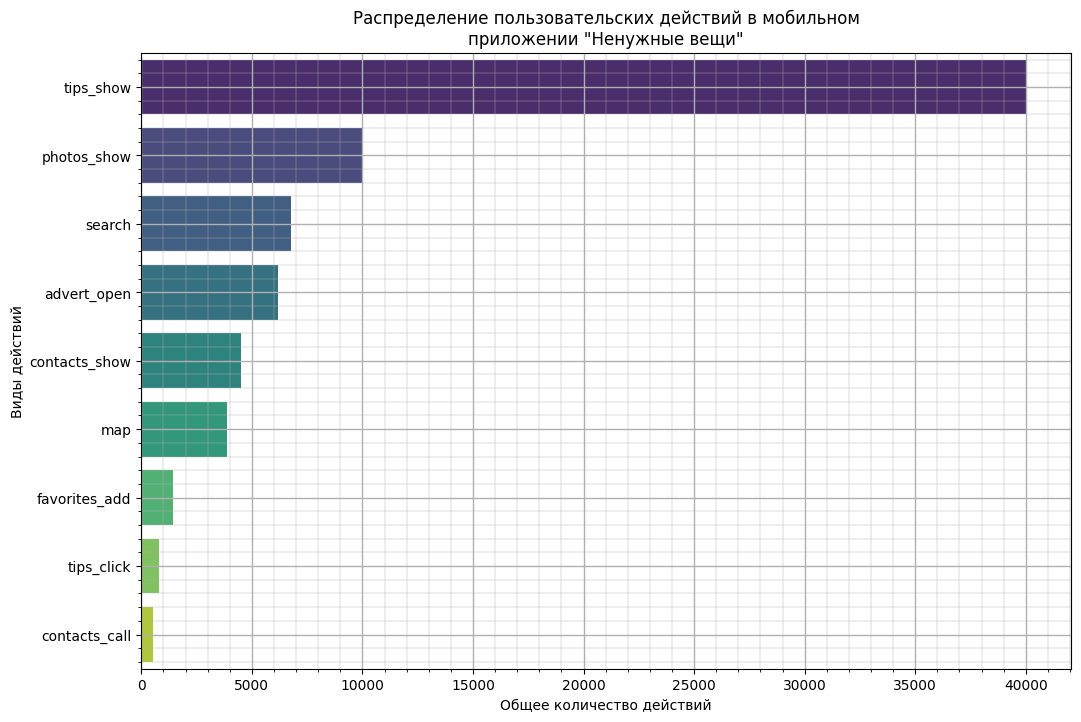

In [ ]:
ax=sns.barplot(y='event_name', x='count', data=df_groupby_event, palette=sns.color_palette('viridis', 9))
ax.set_title('''Распределение пользовательских действий в мобильном
приложении "Ненужные вещи"''', size=12)
ax.set_xlabel('Общее количество действий', size=10)
ax.set_ylabel('Виды действий', size=10)
ax.grid(False)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

*Больше половины всех действий пользователей - это визуальное знакомство с  рекомендованными объявлениями (54%), далее по убывающей - просмотр фоторграфий в объявлениях (13,5%), поисковые действия (9,1%), открытие карточки объявления (8,3%), просмотр контактов (6,1%), открытие карты (5,2%), добавление в избранное (1,9%), клик по рекомендованному объявлению (1,1%), звонок (0,7%). Кликабельность рекомендованных объявлений составляет 2% (814/40055). Пользователи в 6,5 раз чаще видят рекомендованные объявления, чем самостоятельно находят через поисковую систему (40055/6164)*

### Частота пользовательских действий по датам, дням недели и времени суток

In [ ]:
# исследуем частоту пользовательских действий по датам и дням недели
df_groupby_date_weekday=(data.groupby(['date', 'weekday'], as_index = False)['user_id']
     .count().rename(columns={'user_id': 'count_event'})
)
df_groupby_date_weekday

,date,weekday,count_event
0,2019-10-07,понедельник,2545
1,2019-10-08,вторник,2499
2,2019-10-09,среда,2027
3,2019-10-10,четверг,2243
4,2019-10-11,пятница,2030
5,2019-10-12,суббота,1843
6,2019-10-13,воскресенье,2635
7,2019-10-14,понедельник,3034
8,2019-10-15,вторник,2722
9,2019-10-16,среда,2730


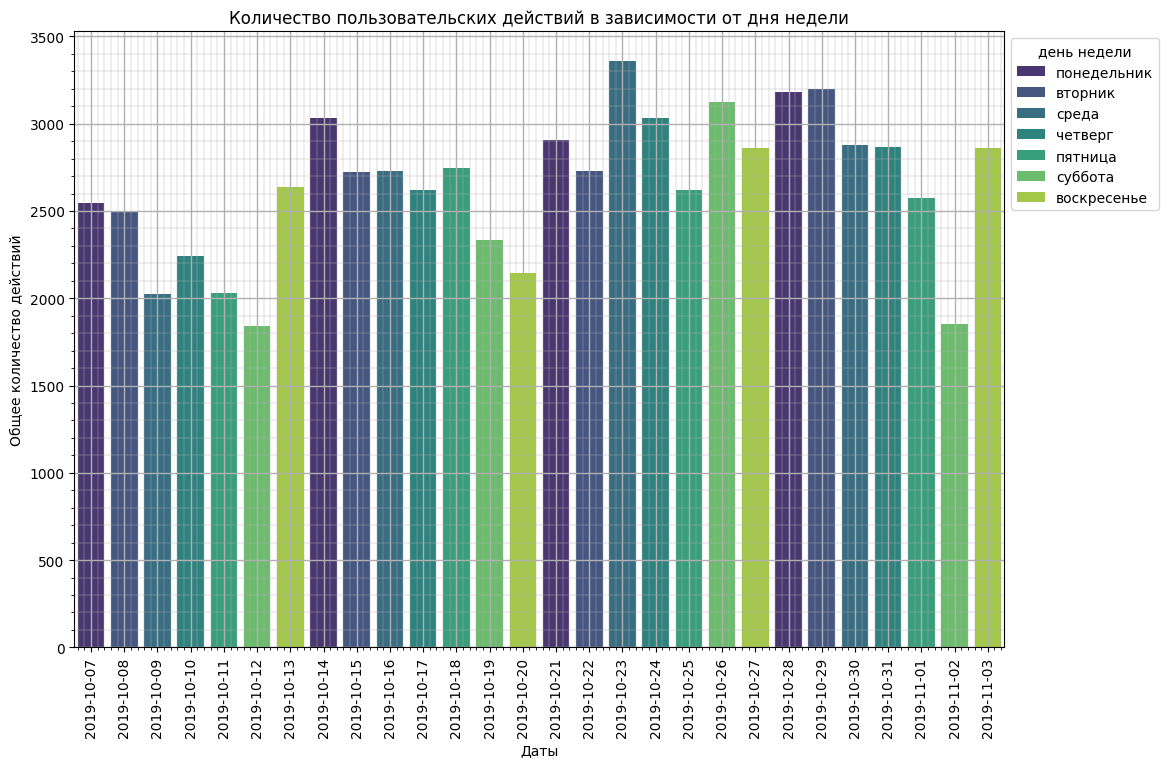

In [ ]:
ax=sns.barplot(
    y='count_event',
    x='date',
    data=df_groupby_date_weekday,
    hue='weekday',
    palette=sns.color_palette('viridis', 7)
)
ax.legend(title='день недели', loc = 'upper left', bbox_to_anchor = (1, 1))
ax.set_title('Количество пользовательских действий в зависимости от дня недели', size=12)
ax.set_xlabel('Даты', size=10)
ax.set_ylabel('Общее количество действий', size=10)
ax.grid(False)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.xticks(rotation=90)
plt.show()

*Данные о пользовательских действиях в мобильном приложении получены за короткий период - всего 4 недели, по имеющимся данным можно сказать, что на первой неделе пользователи совершали меньше всего действий, рост активности на последующих неделях. Нет выраженной тенденции совершать чаще действия в будни или выходные, проанализируем частоту действий по дням недели по диаграмме boxplot*

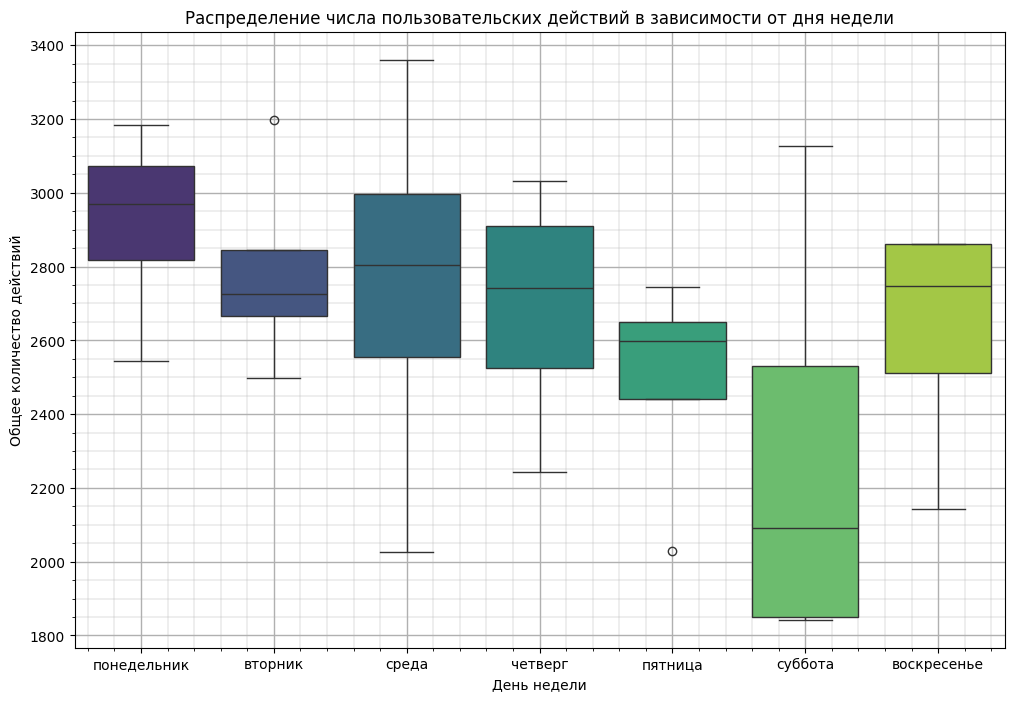

In [ ]:
# выведем все данные в разрезе только дней недели в диаграмме boxplot
ax=sns.boxplot(
    y='count_event',
    x='weekday',
    data=df_groupby_date_weekday,
    palette=sns.color_palette('viridis', 7)
)
ax.set_title('Распределение числа пользовательских действий в зависимости от дня недели', size=12)
ax.set_xlabel('День недели', size=10)
ax.set_ylabel('Общее количество действий', size=10)
ax.grid(False)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

*Самое высокое медианное значение количества пользовательских действий, совершенных **в понедельник** (около 3000), далее в среду (около 2800), четверг и воскресенье (около 2750). Самое низкое медианное значение количества пользовательских действий в субботу (около 2100).*

In [ ]:
# исследуем частоту пользовательских действий в зависимости от времени суток
df_groupby_date_part_of_day=(data.groupby(['date', 'part_of_day'], as_index = False)['user_id']
     .count().rename(columns={'user_id': 'count_event'})
)
df_groupby_date_part_of_day

,date,part_of_day,count_event
0,2019-10-07,вечер,1111
1,2019-10-07,день,863
2,2019-10-07,ночь,191
3,2019-10-07,утро,380
4,2019-10-08,вечер,698
5,2019-10-08,день,1299
6,2019-10-08,ночь,49
7,2019-10-08,утро,453
8,2019-10-09,вечер,557
9,2019-10-09,день,908


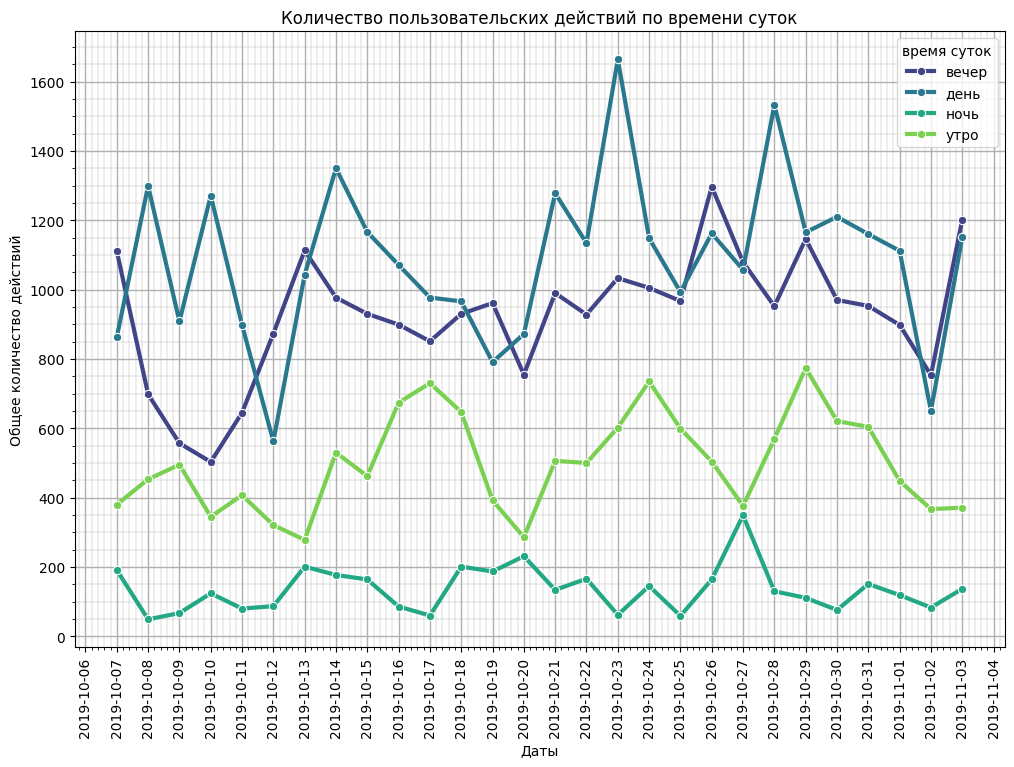

In [ ]:
ax=sns.lineplot(
    y='count_event',
    x='date',
    data=df_groupby_date_part_of_day,
    hue='part_of_day',
    linewidth = 3,
    marker='o',
    palette=sns.color_palette('viridis', 4)
)
ax.set_title('Количество пользовательских действий по времени суток', size=12)
ax.set_xlabel('Даты', size=10)
ax.set_ylabel('Общее количество действий', size=10)
ax.legend(title='время суток')
ax.grid(False)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

*Большинство действий в мобильном приложении пользователи совершают днем, далее - вечером и утром. Меньше всего пользовательских действий совершено ночью.*

### Исследование пользовательской активности

#### Количество сессий на одного пользователя

In [ ]:
# рассчитаем количество сессий для каждого пользователя
df_count_sessions_by_one_user=(data.groupby(['user_id'], as_index = False)['session_id'].nunique()
  .sort_values('session_id', ascending=False).rename(columns={'session_id': 'count_sessions'})
)
df_count_sessions_by_one_user.head()

,user_id,count_sessions
615,21230dd9-2f7f-4b77-a436-43d4d10388e0,72
401,1580911b-65db-4f1a-be7e-1ca39becac30,47
1668,6383ff6a-04b8-4562-a98f-bb4f760d3c39,38
235,0d9e5bb7-0ad6-4b62-a118-b1e4f5b31dfa,32
3162,be1449f6-ca45-4f94-93a7-ea4b079b8f0f,32


In [ ]:
# ознакомимься с основными статистическими показателями столбца `count_sessions` датафрейма df_count_sessions_by_one_user
df_count_sessions_by_one_user['count_sessions'].describe()

,count_sessions
count,"4,293.00"
mean,2.23
std,3.00
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,72.00


*Среднее число сессий на одного пользователя - 2,23 сессии, медианное значение - 1 сессия. Среднее значение больше медианного в 2,23 раза за счет присутствия аномально большого количества сессий на одного пользователя, максимальное значение составляет 72 сессии, изучим аномальные значения.*

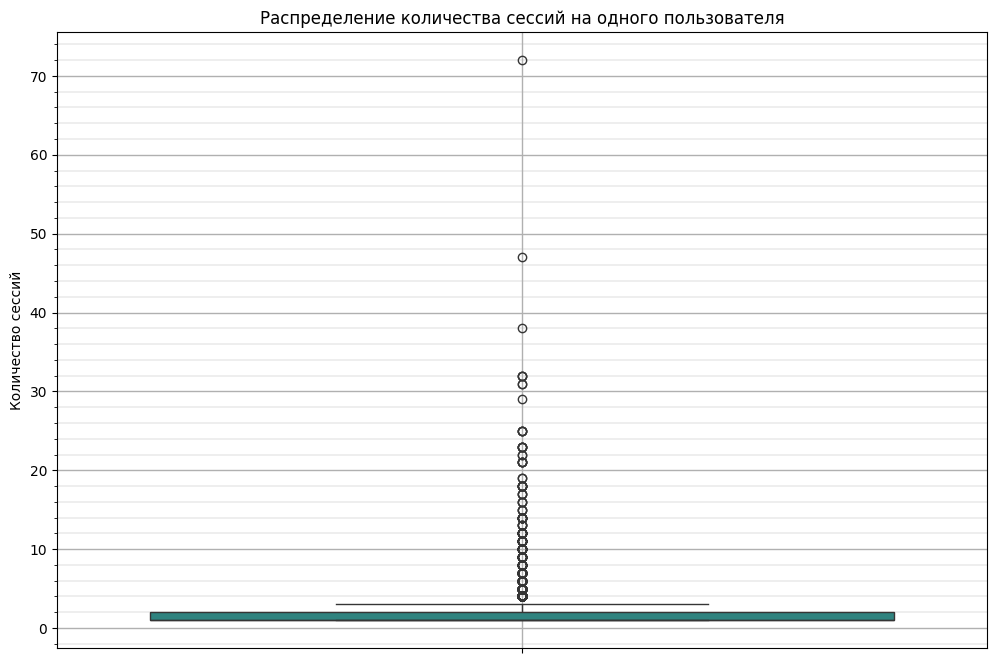

In [ ]:
ax=sns.boxplot(
        data=df_count_sessions_by_one_user,
        y='count_sessions',
        palette=sns.color_palette('viridis', 1)
    )
ax.set_title('Распределение количества сессий на одного пользователя', size=12)
ax.set_ylabel('Количество сессий', size=10)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

In [ ]:
# изучим пользователя с аномально большим количеством сессий - 72 сессии (user_id='21230dd9-2f7f-4b77-a436-43d4d10388e0')
df_count_sessions_72=(data.query('user_id == "21230dd9-2f7f-4b77-a436-43d4d10388e0"')
.groupby(['date', 'event_name'], as_index = False)['event_time']
  .count().sort_values('date').rename(columns={'event_time': 'count_event'})
)
df_count_sessions_72

,date,event_name,count_event
0,2019-10-10,contacts_show,3
1,2019-10-10,tips_show,43
2,2019-10-11,contacts_show,8
3,2019-10-11,map,1
4,2019-10-11,tips_show,42
5,2019-10-12,contacts_show,1
6,2019-10-12,map,2
7,2019-10-12,tips_show,11
8,2019-10-13,tips_show,15
9,2019-10-14,contacts_show,1


*При изучении аномального числа сессий у пользователя user_id='21230dd9-2f7f-4b77-a436-43d4d10388e0' установлен ежедневный мониторинг пользователем объявлений в течение 25 дней, ошибок в данных не выявлено*

*Установлено низкое медианное число сессий на одного пользователя - многие пользователи не возвращаются в приложение повторно, за исследуемый период чаще всего пользователи совершали только одну сессию.*

#### Длительность сессий

In [ ]:
# ознакомимься с основными статистическими показателями столбца `duration_minute` датафрейма data_session
data_session['duration_minute'].describe()

,duration_minute
count,"9,573.00"
mean,17.52
std,28.54
min,0.00
25%,0.73
50%,6.81
75%,21.75
max,434.99


*Всего пользователями совершено 9573 сессий, средняя продолжительность сессии - 17,52 мин., медианное значение - 6,81 мин. Среднее значение больше медианного в 2,5 раза за счет присутствия аномально длинных сессий, максимальное значение составляет 434 мин (более 7 часов). Также пользователями были совершены сессии с продолжительностью 0 мин, изучим аномально длинные и нулевые сессии.*

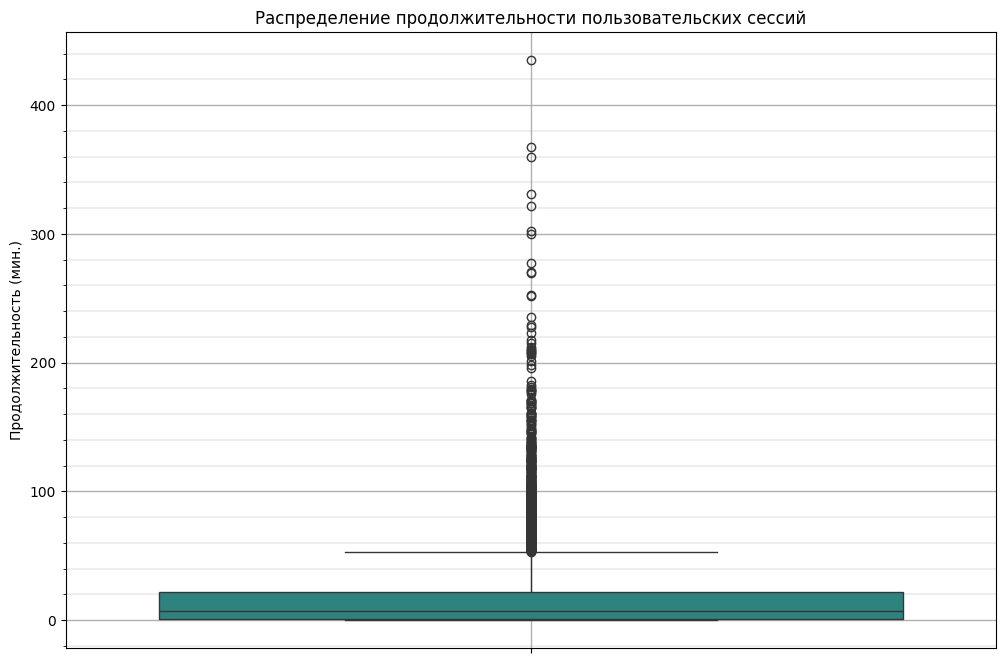

In [ ]:
ax=sns.boxplot(
        data=data_session,
        y='duration_minute',
        palette=sns.color_palette('viridis', 1)
    )
ax.set_title('Распределение продолжительности пользовательских сессий', size=12)
ax.set_ylabel('Продолжительность (мин.)', size=10)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

In [ ]:
# исследуем сессии с продолжительностью более 300 мин. (более 5 часов)
df_duration_more_300_minute=(data.query('duration_minute>300').groupby(['session_id', 'user_id', 'duration_minute'], as_index = False)['event_name']
  .count().sort_values('user_id', ascending=False).rename(columns={'event_name': 'count_event'})
)
df_duration_more_300_minute

,session_id,user_id,duration_minute,count_event
4,7567,cb36854f-570a-41f4-baa8-36680b396370,330.86,95
5,7586,cb36854f-570a-41f4-baa8-36680b396370,302.28,51
3,7194,c140f88a-c544-4ce6-a6bd-578a1a0d1b18,360.05,169
2,5756,9ce63488-758a-481a-bcb5-a02b467e1d84,367.60,288
1,4340,74041397-d70d-49ab-8d8e-7f9d00f2ffea,321.97,91
0,1398,21230dd9-2f7f-4b77-a436-43d4d10388e0,434.99,38


*Пользователями совершено шесть сессий продолжительностью более 5 часов, количество действий в таких сессиях - от 38 до 288. Пользователь с user_id cb36854f-570a-41f4-baa8-36680b396370 дважды совершал сессии более 5 часов с числом пользовательских действий 51 и 95. Ошибок в данных не установлено.*

In [ ]:
# исследуем сессии с продолжитеьностью 0 мин., т.е. сессии, в которых было совершено 1 действие
df_=data.groupby(['session_id', 'event_name'], as_index = False).agg({'user_id': 'count'}).rename(columns={'user_id': 'count_event'})
df_one_event=df_[df_['count_event']==1]
display(len(df_one_event))
df_one_event.groupby('event_name', as_index = False)['count_event'].count().sort_values('count_event', ascending=False)

6177

,event_name,count_event
4,map,1309
8,tips_show,1127
6,search,1107
2,contacts_show,838
5,photos_show,779
0,advert_open,339
3,favorites_add,269
7,tips_click,228
1,contacts_call,181


*Чаще всего в сессиях с одним действием пользователи открывали карту объявлений, видимо для изучения маршрута по ранее отобранному объявлению.*

*При изучении аномально длинных и нулевых сессий ошибок в данных не установлено*

#### Частота совершения действий на протяжении одной сесиии

In [ ]:
# подсчитаем количество пользовательских действий, совершенных за одну сессию
df_count_event_by_session=(data.groupby(['session_id', 'duration_minute'], as_index = False)['event_name']
     .count().rename(columns={'event_name': 'count_event'}).sort_values('count_event', ascending=False)
)
df_count_event_by_session.head()

,session_id,duration_minute,count_event
5755,5756,367.60,288
7193,7194,360.05,169
6451,6452,128.52,127
6347,6348,185.99,115
7192,7193,209.09,114


In [ ]:
# ознакомимься с основными статистическими показателями столбца `count_event` датафрейма df_count_event_by_session
df_count_event_by_session['count_event'].describe()

,count_event
count,"9,573.00"
mean,7.75
std,10.59
min,1.00
25%,2.00
50%,5.00
75%,9.00
max,288.00


*Среднее число пользовательских действий за одну сессию - 7,75 действия, медианное значение - 5 действий. Среднее значение больше медианного за счет присутствия аномально больших значений, максимальное значение составляет 288 действий.*

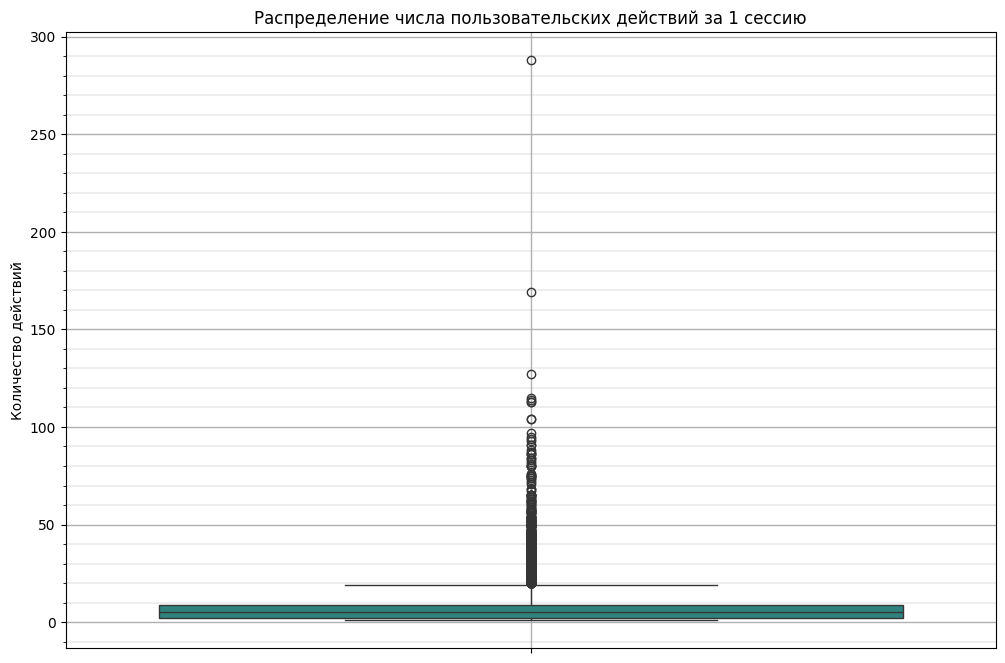

In [ ]:
ax=sns.boxplot(
        data=df_count_event_by_session,
        y='count_event',
        palette=sns.color_palette('viridis', 1)
    )
ax.set_title('Распределение числа пользовательских действий за 1 сессию', size=12)
ax.set_ylabel('Количество действий', size=10)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

*Сессия с 288 действиями пользователя (session_id=5756) была рассмотрена в подразделе "Длительность сессий", ошибок в данных не установлено*

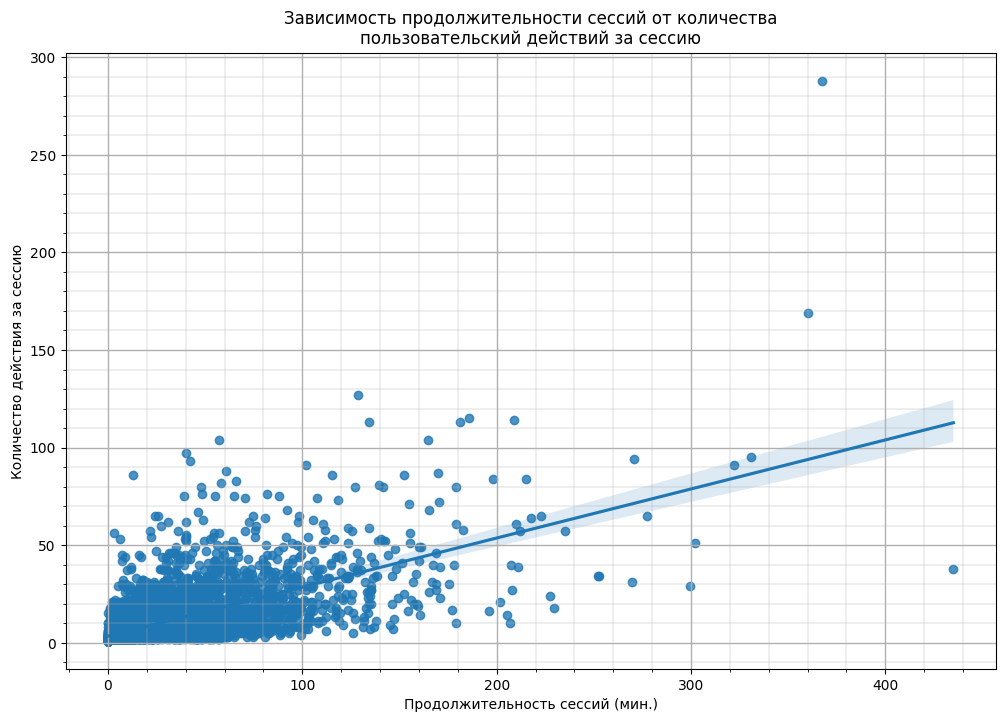

In [ ]:
# Исследуем зависимость продолжительности сессий и количества действий за сессию,
# построим диаграмму рассеяния и рассчитаем коэффициент корреляции Пирсена
ax=sns.regplot(
    x='duration_minute',
    y='count_event',
    data=df_count_event_by_session)
ax.set_title('''Зависимость продолжительности сессий от количества
пользовательский действий за сессию''', size=12)
ax.set_xlabel('Продолжительность сессий (мин.)', size=10)
ax.set_ylabel('Количество действия за сессию', size=10)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

In [ ]:
print('Коэффициент корреляции продолжительности сессий и количества действий за сессию: {:.2f}'.format(df_count_event_by_session['duration_minute'].
    corr(df_count_event_by_session['count_event'])))

Коэффициент корреляции продолжительности сессий и количества действий за сессию: 0.68


*Установлена высокая положительная корреляция между продолжительностью сессий и количеством действий за сессию.*

### Удержание пользователей (retention rate)

Рассчитаем коэффициент удержания пользователей (разделим количество активных пользователей на текущий день на количество активных пользователей на первый день), для этого:
- создадим профили пользователей (функция get_profiles)
- рассчитаем лайфтайм пользователя для каждой сессии, построим таблицу удержания, выслим размер когорт, рассчитаем retention rate   (функция get_retention)

In [ ]:
# функция для создания пользовательских профилей
def get_profiles(data):

    # находим параметры первых посещений
    profiles = (
        data.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first', 'source': 'first'})
        .rename(columns={'event_time': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату и месяц первого посещения
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    return profiles

In [ ]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
    ):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')


    # присоединим время начала сессии к профилям по столбцу user_id
    result_raw = result_raw.merge(
        sessions[['user_id', 'event_time_min']], on='user_id', how='left'
        )

    # для каждой сессии рассчитаем lifetime в днях
    result_raw['lifetime'] = (
        result_raw['event_time_min'] - result_raw['first_ts']
        ).dt.days

    # переименуем столбец с временем начала сессии в session_start
    result_raw=result_raw.rename(columns={'event_time_min': 'session_start'})

    # построим таблицу удержания
    result_grouped = result_raw.pivot_table(
        index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )

    # вычислим размеры когорт
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
        )

    # объединим размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
        ).fillna(0)

    # рассчитаем retention rate - делим данные таблицы удержания на размеры когорт
    result_grouped = result_grouped.div(
        result_grouped['cohort_size'], axis=0
        )

    # исключаем из результата все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[['cohort_size'] + list(range(horizon_days))]

    return result_raw, result_grouped

In [ ]:
# составим профили пользователей
profiles= get_profiles(data)

# задаём момент и горизонт анализа данных для расчета удержания пользователей
# максимальный горизонт анализа, чтобы включить в отчёт пользователей за все дни, составляет 15 дней
observation_date = data['event_time'].max().date()
horizon_days = 15

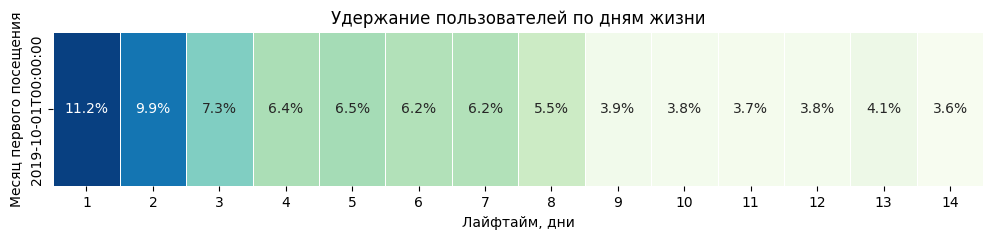

In [ ]:
# построим тепловую карту общего удержания пользователей без разбивки на дни привлечения

retention_raw, retention = get_retention(
    profiles, data_session, observation_date, horizon_days, dimensions=['month']
)

fig = plt.subplots(figsize=(12, 2))
sns.heatmap(retention.drop(columns = ['cohort_size', 0]),
            annot = True,
            fmt = '.1%',
            cmap='GnBu',
            linewidths=.5,
            cbar=False
           )
plt.title('Удержание пользователей по дням жизни')
plt.xlabel('Лайфтайм, дни')
plt.ylabel('Месяц первого посещения')
plt.show()

*В приложении "Ненужные вещи" за период данных с 07.10.2019 по 20.10.2019 общее удержание на 7-ой день жизни пользователей составило 6,2%, на 14-й день жизни - 3,6%. Посмотрим на удержание пользователей в разрезе дней привлечения.*

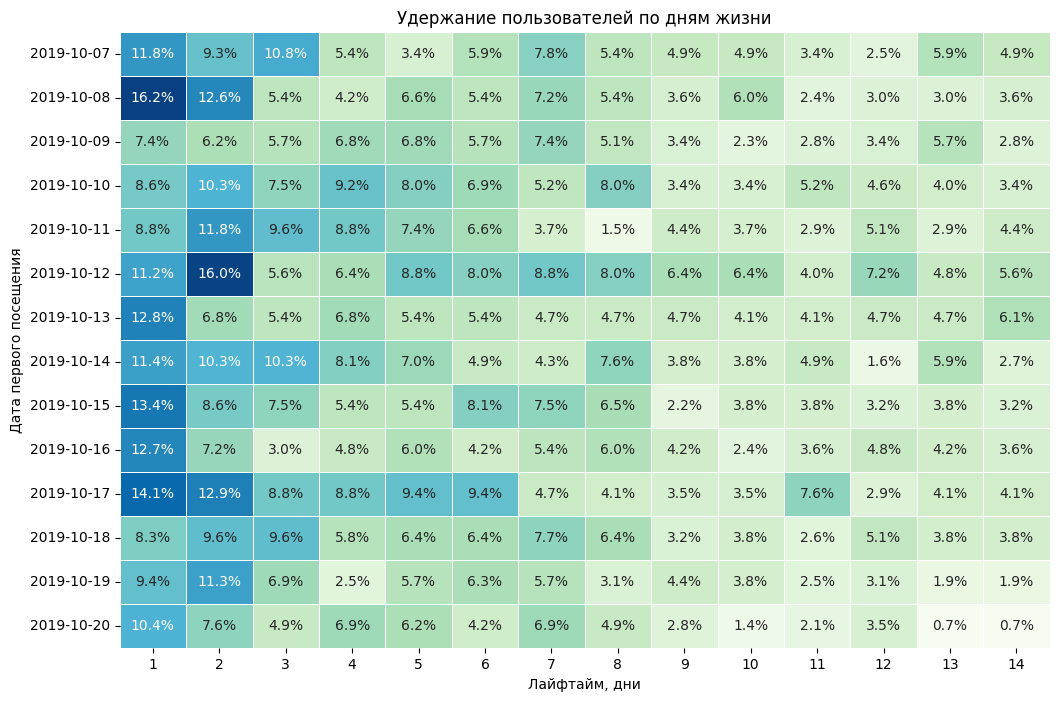

In [ ]:
# построим тепловую карту удержания пользователей по дням привлечения

retention_raw, retention = get_retention(
    profiles, data_session, observation_date, horizon_days, dimensions=['dt']
)

sns.heatmap(retention.drop(columns = ['cohort_size', 0]),
            annot = True,
            fmt = '.1%',
            cmap='GnBu',
            linewidths=.5,
            cbar=False
           )
plt.title('Удержание пользователей по дням жизни')
plt.xlabel('Лайфтайм, дни')
plt.ylabel('Дата первого посещения')
plt.show()

*Коэффициент удержания пользователей в приложении максимальный в 1-ый (от 7,4% до 16,2%) и 2-ой дни жизни (от 6,2% до 16,0%), на 14-й день вернулись в приложение только от 0,7% до 6,1% пользователей. Лучше всего удержались пользователи, привлеченные 12.10.2019 и 13.10.2019, retention rate для этих когорт - 5,6% и 6,1%. Следует понять какая работа по привлечению была проведена накануне этих дней, для продолжения положительного опыта.*

### Анализ конверсии в целевое действие contacts_show (conversion)

Рассчитаем общую конверсию пользователей в целевое действие 'contact_show' (разделим число уникальных пользователей, совершивших целевое действие, на количество всех уникальных пользователей)

In [ ]:
# отфильтруем пользовательские действия contact_show
data_contact_show=data[data['event_name']=='contacts_show'].reset_index(drop=True)

# рассчитаем общую конверсию пользователей в целевое действие 'contact_show'
total_contacts_show = data_contact_show['user_id'].nunique()
total_unique_users = profiles['user_id'].nunique()
total_conversion = round((total_contacts_show / total_unique_users)*100, 2)
print(f'Общая конверсия пользователей в целевое действие contacts_show: {total_conversion} %')

Общая конверсия пользователей в целевое действие contacts_show: 22.85 %


Рассчитаем конверсию по "дням жизни", для этого:
- создадим профили пользователей (функция get_profiles)
- найдем дату и время первого целевого действия каждого пользователя, рассчитаем лайфтайм пользователя для каждого целевого действия, построим таблицу конверсии, посчитаем сумму с накоплением для каждой строки таблицы конверсии, выслим размер когорт, рассчитаем conversion (функция get_conversion)

In [ ]:
# функция для расчёта конверсии по "дням жизни"

def get_conversion(
    profiles,
    data_contact_show,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключим пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определим дату и время первого целевого действия для каждого пользователя
    first_contact_show = (
        data_contact_show.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .reset_index()
    )

    # добавим данные о целевом действии в профили
    result_raw = result_raw.merge(
        first_contact_show[['user_id', 'event_time']], on='user_id', how='left'
    )

    # рассчитаем лайфтайм
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # строим таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # вычмсляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # объединм таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]

        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    return result_raw, result_grouped

In [ ]:
# обновим профили пользователей
profiles= get_profiles(data)

# задаём момент и горизонт анализа данных для расчета удержания пользователей
# максимальный горизонт анализа, чтобы включить в отчёт пользователей за все дни, составляет 15 дней
observation_date = data['event_time'].max().date()
horizon_days = 15

# рассчитаем конверсию без учета разбивки на группы
conversion_row, conversion = get_conversion(
    profiles,
    data_contact_show,
    observation_date,
    horizon_days
    )

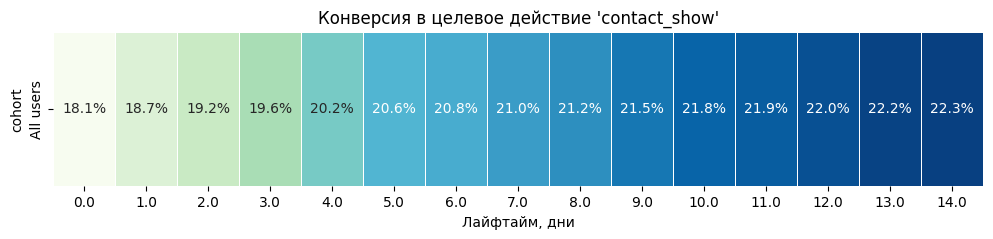

In [ ]:
# построим тепловую карту конверсии в целевое действие 'contact_show' без учета разбивки на группы
fig = plt.subplots(figsize=(12, 2))
sns.heatmap(conversion.drop(columns = ['cohort_size']),
            annot = True,
            fmt = '.1%',
            cmap='GnBu',
            linewidths=.5,
            cbar=False
           )
plt.title("Конверсия в целевое действие 'contact_show'")
plt.xlabel('Лайфтайм, дни')
plt.show()

*Установлен рост конверсии в целевое действие 'contact_show' с учетом горизонта анализа: от 18,1% в день первого посещения приложения до 22,3% на 15-ый день посещения приложения.*

**Вывод по разделу "Исследовательский анализ пользовательского поведения":**

1. Больше половины всех действий пользователей - это визуальное знакомство с рекомендованным объявлением (54% всех действий).

2. Многие пользователи предпочитают решать свои бытовые вопросы в приложении "Ненужные вещи" в начале рабочей недели, а не в выходные - больше всего пользовательских действий в понедельник и среду. Большинство действий в мобильном приложении пользователи совершают днем и вечером.

3. Пользователи в 6,5 раз чаще видят рекомендованные объявления, чем самостоятельно находят через поисковую систему. Кликабельность рекомендованных объявлений составляет 2%.

4. Среднее число сессий на одного пользователя - 2,23 сессии, медианное значение - 1 сессия, 72 - максимальное число сессий на одного пользователя.

5. Средняя продолжительность сессии - 17,52 мин., медианное значение - 6,81 мин, 434 мин. (более 7 часов) - максимальная длительность сессии.

6. Среднее число пользовательских действий за одну сессию - 7,75 действия, медианное значение - 5 действий, 288 - максимальное число действий за 1 сессию.

7. При изучении аномальных данных ошибок не установлено.

8. Установлена высокая положительная корреляция между продолжительностью сессий и количеством действий за сессию

9. Установлено низкое медианное число сессий на одного пользователя - многие пользователи не возвращаются в приложение повторно, за исследуемый период чаще всего пользователи совершали только одну сессию.

10. Коэффициент удержания пользователей в приложении максимальный в 1-ый (от 7,4% до 16,2%) и 2-ой дни жизни (от 6,2% до 16,0%), на 14-й день в приложение возвращаются от 0,7% до 6,1% пользователей.

11. Общая конверсия пользователей в целевое действие 'contact_show' - 22,85%.

12. Установлен рост конверсии в целевое действие 'contact_show': от 18,1% в день первого посещения приложения до 22,3% на 15-ый день посещения приложения.

##  Сегментация пользователей на основе поведения

Сегментируем пользователей по источнику, с которого было установлено приложение

Сегментация пользователей по источнику привлечения позволит нам правильно распределить рекламный бюджет и настроить контекстную рекламу в тех поисковых системах, через которые больше всего приходит пользователей или, например, пользователи обладают большей конверсионностью в целевые действия в приложении.
    
На протяжении последних лет в России самой популярной поисковой системой является «Яндекс». Доля «Яндекса» значительно увеличилась и, скорее всего, будет расти дальше. При этом Google до сих пор остаётся лидером в мире. Предполагаем, что в результате исследования пользовательского поведения в мобильном приложении "Ненужные вещи" преимущество будет за самой популярной в России поисковой системой «Яндекс».

In [ ]:
# Изучим уникальные значения источников
mobile_sources['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

In [ ]:
# рассчитаем долю сегментов
data_sources=data.groupby(['source'], as_index = False)['user_id'].nunique().sort_values('user_id', ascending=False)
data_sources['%']=round(data_sources['user_id']*100/data_sources['user_id'].sum(), 1)
data_sources

,source,user_id,%
2,yandex,1934,45.10
1,other,1230,28.70
0,google,1129,26.30


*Размер групп и их гомогенность позволяют применить данный способ сегментации для изучения поведения выделенных групп и выявления целевой и смежной аудитории приложения*

### Анализ показателя удержания пользователей в разрезе групп

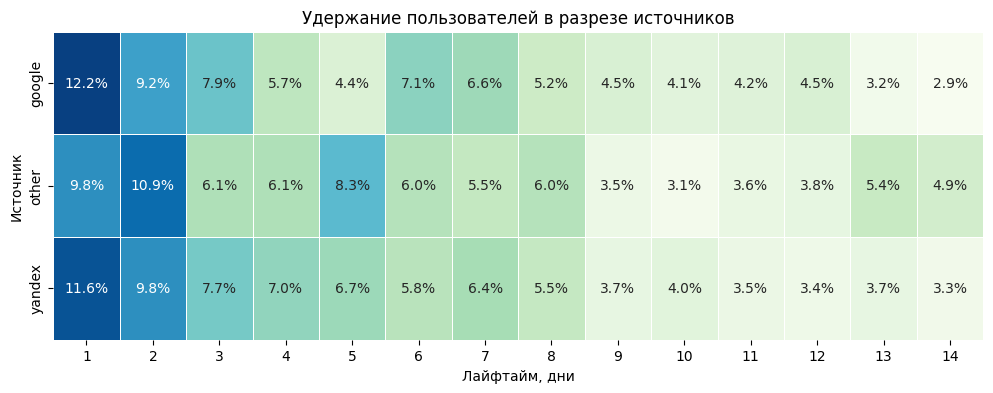

In [ ]:
# построим тепловую карту удержания пользователей в разрезе групп
retention_raw, retention = get_retention(
    profiles, data_session, observation_date, horizon_days, dimensions=['source']
)

fig = plt.subplots(figsize=(12, 4))
sns.heatmap(retention.drop(columns = ['cohort_size', 0]),
            annot = True,
            fmt = '.1%',
            cmap='GnBu',
            linewidths=.5,
            cbar=False
           )
plt.title('Удержание пользователей в разрезе источников')
plt.xlabel('Лайфтайм, дни')
plt.ylabel('Источник')
plt.show()

*При сравнении удержания пользователей, пришедших из двух основных поисковых систем Google и Yandex, на 15-ый день жизни лидирует Yandex - retention rate составляет 3,3%, у Google удержание ниже -2,9%. Лучше всего удерживаются пользователи из прочих поисковых систем, retention rate - 4,9%.*

### Анализ показателя конверсии в целевое действие 'contacts_show' в разрезе групп

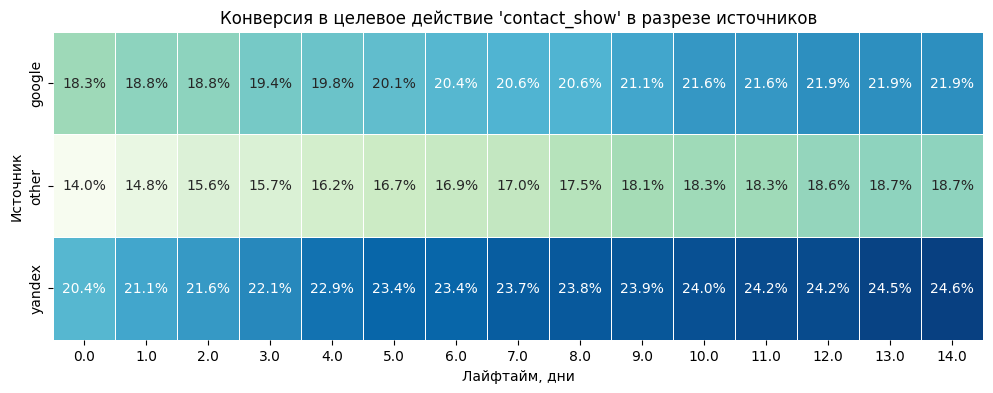

In [ ]:
# построим тепловую карту конверсии в целевое действие 'contact_show' в разрезе групп

conversion_row, conversion = get_conversion(
    profiles,
    data_contact_show,
    observation_date,
    horizon_days,
    dimensions=['source']
    )

fig = plt.subplots(figsize=(12, 4))
sns.heatmap(conversion.drop(columns = ['cohort_size']),
            annot = True,
            fmt = '.1%',
            cmap='GnBu',
            linewidths=.5,
            cbar=False
           )
plt.title("Конверсия в целевое действие 'contact_show' в разрезе источников")
plt.xlabel('Лайфтайм, дни')
plt.ylabel('Источник')
plt.show()

*Лучше конверсия у пользователей, пришедших через Yandex: 20,4% новых пользователей совершают целевое действие "contact_show" в первый день посещения приложения, а к 15-му дню «жизни» доля пользователей с целевым действием достигает 24,6%.*
*Конверсия у пользователей, пришедших через Google хуже: в первый день 18,3% новых пользователей совершают целевое действие, а к 15-му дню «жизни» конверсия в целевое действие - 21,9%.*

**Вывод по разделу "Сегментация пользователей по источнику, с которого установлено приложение":**

При сравнении двух групп пользователей, пришедших из Google и Yandex, установлено:

1. По удержанию пользователей **лидирует Yandex** - retention rate на 15-ый день жизни пользователей из Yandex составляет 3,3%, из Google - 2,9%.

2. По конверсии в целевое действие "contact_show" также **лидирует Yandex** - 20,4% новых пользователей совершают целевое действие в 1-ый день посещения приложения, а к 15-му дню «жизни» доля пользователей с целевым действием достигает 24,6%. Конверсия у пользователей, пришедших через Google ниже: в первый день посещения конверсия составляет 18,3%, а к 15-му дню «жизни» - 21,9%.

## Проверка статистических гипотез

### Имеется две группы пользователей: первая - установившие приложение через Yandex, вторая - через Google. Проверим гипотезу: группы демонстрируют разную конверсию в просмотры контактов.

**Сформулируем гипотезу:**

- Нулевая гипотеза - в группах нет статистически значимых различий между долями пользователей, совершивших целевое действие "contact_show"

- Альтернативная гипотеза - статистически значимые различия есть

**Проверка гипотезы о равенстве долей осуществляется с помощью `z-статистики`**

**Критический уровень статистической значимости примем 0.05**

In [ ]:
# отфильтруем датасет data по источникам Yandex и Google, оставим только нужные столбцы
data_yandex_google = data[
    (data['source'] == 'yandex') | (data['source'] == 'google')
    ].reset_index()
data_yandex_google=data_yandex_google.rename(columns={'source':'group'})
data_yandex_google=data_yandex_google[['user_id', 'event_time', 'event_name', 'group']]
data_yandex_google.head()

,user_id,event_time,event_name,group
0,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,search,yandex
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:35:19.296599,search,yandex
2,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:36:44.344691,search,yandex
3,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:40:38.990477,photos_show,yandex
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:42:13.837523,photos_show,yandex


In [ ]:
# подсчитаем количество уникальных пользователей в каждой группе
group_sizes = (
    data_yandex_google.groupby('group',  as_index = False)
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'user_count'})
    )
group_sizes

,group,user_count
0,google,1129
1,yandex,1934


In [ ]:
# подсчитаем количество уникальных пользователей, совершивших целевые действия в каждой группе
contact_show_sizes = (
    data_yandex_google.query('event_name=="contacts_show"').groupby('group',  as_index = False)
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'user_count'})
    )
contact_show_sizes

,group,user_count
0,google,275
1,yandex,478


In [ ]:
# зададим уровень значимости
alpha = 0.05

successes = contact_show_sizes['user_count'].to_list()
trials = group_sizes['user_count'].to_list()

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:**
*Нулевая гипотеза о равенстве в двух генеральных совокупностях долей пользователей, совершивших целевое действие, не может быть отвергнута, нет оснований считать доли разными. Разница между конверсиями двух групп, расчитанная в предыдущем разделе не оказалась значимой.*

###  Имеется две группы пользователей: первая - установившие приложение через Yandex, вторая - через Google. Проверим, имеется ли стат.значимость в числе сессий между группами.

**Сформулируем гипотезу:**

- Нулевая гипотеза - различий в среднем числе сессий на пользователя между группами нет  

- Альтернативная гипотеза - статистически значимые различия в среднем  есть

**Так как для проведения теста берем две выборки и они независимы между собой, то применим двухвыборочный t-тест для независимых выборок `scipy.stats.ttest_ind()`**

**Критический уровень статистической значимости примем 0.05**

In [ ]:
# для проверки гипотезы из датафрейма data возьмем данные о количестве сессий на каждого пользователя,
# установившего приложение через Yandex и через Google

quantity_sessions_yandex=(
    data[(data['source']=='yandex')].groupby('user_id',  as_index = False)
    .agg({'session_id': 'nunique'})
    .rename(columns={'session_id': 'quantity_sessions'})
    )['quantity_sessions']

quantity_sessions_google=(
    data[(data['source']=='google')].groupby('user_id',  as_index = False)
    .agg({'session_id': 'nunique'})
    .rename(columns={'session_id': 'quantity_sessions'})
    )['quantity_sessions']

print(quantity_sessions_yandex.count(), quantity_sessions_google.count())

1934 1129


In [ ]:
print(f'Cреднее число сессий на каждого пользователя, пришедшего через Yandex: {quantity_sessions_yandex.mean()}')
print(f'Cреднее число сессий на каждого пользователя, пришедшего через Google: {quantity_sessions_google.mean()}')

# зададим уровень значимости
alpha = 0.05

# ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу,
# выборки не равны по размеру, поэтому примем значение праметра equal_var=False
results = st.ttest_ind(quantity_sessions_yandex, quantity_sessions_google, equal_var=False)
print(f'p-value: {results.pvalue}')

# проверим p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Cреднее число сессий на каждого пользователя, пришедшего через Yandex: 2.156153050672182
Cреднее число сессий на каждого пользователя, пришедшего через Google: 2.3055801594331267
p-value: 0.21096783754148804
Нет оснований отвергнуть нулевую гипотезу


**Вывод:**
*Нулевая гипотеза о равенстве среднего количества сесий пользователей, пришедших через Yandex и Google, не может быть отвергнута. Значение p-value показывает, что вероятность случайно получить такое же значение среднего числа сессий или более удаленное значение от него равна 21,1%. Это большая вероятность, чтобы делать вывод о значимом различии между средними количествами сессий пользователей из разных источников.*

## Выводы и базовые рекомендации

**Вывод по разделу "Исследовательский анализ пользовательского поведения":**

1. Больше половины всех действий пользователей - это визуальное знакомство с рекомендованным объявлением (54% всех действий).

2. Многие пользователи предпочитают решать свои бытовые вопросы в приложении "Ненужные вещи" в начале рабочей недели, а не в выходные - больше всего пользовательских действий в понедельник и среду. Большинство действий в мобильном приложении пользователи совершают днем и вечером.

3. Пользователи в 6,5 раз чаще видят рекомендованные объявления, чем самостоятельно находят через поисковую систему. Кликабельность рекомендованных объявлений составляет 2%.

4. Среднее число сессий на одного пользователя - 2,23 сессии, медианное значение - 1 сессия, 72 - максимальное число сессий на одного пользователя.

5. Средняя продолжительность сессии - 17,52 мин., медианное значение - 6,81 мин, 434 мин. (более 7 часов) - максимальная длительность сессии.

6. Среднее число пользовательских действий за одну сессию - 7,75 действия, медианное значение - 5 действий, 288 - максимальное число действий за 1 сессию.

7. При изучении аномальных данных ошибок не установлено.

8. Установлена высокая положительная корреляция между продолжительностью сессий и количеством действий за сессию

9. Установлено низкое медианное число сессий на одного пользователя - многие пользователи не возвращаются в приложение повторно, за исследуемый период чаще всего пользователи совершали только одну сессию.

10. Коэффициент удержания пользователей в приложении максимальный в 1-ый (от 7,4% до 16,2%) и 2-ой дни жизни (от 6,2% до 16,0%), на 14-й день в приложение возвращаются от 0,7% до 6,1% пользователей.

11. Общая конверсия пользователей в целевое действие 'contact_show' - 22,85%.

12. Установлен рост конверсии в целевое действие 'contact_show': от 18,1% в день первого посещения приложения до 22,3% на 15-ый день посещения приложения.

**При сравнении двух групп пользователей, пришедших через Google и Yandex, установлено**:

1. По показателю удержания пользователей **лидирует Yandex** - retention rate на 15-ый день жизни пользователей из Yandex составляет 3,3%, из Google - 2,9%.

2. По показателю конверсии в целевое действие "contact_show" также **лидирует Yandex** - 20,4% новых пользователей совершают целевое действие в 1-ый день посещения приложения, а к 15-му дню «жизни» доля пользователей с целевым действием достигает 24,6%. Конверсия у пользователей, пришедших через Google ниже: в первый день посещения конверсия составляет 18,3%, а к 15-му дню «жизни» - 21,9%.

3. Проведена проверка статистических гипотез в отношении этих двух групп пользователей (установившие приложение через Yandex и через Google).

- Гипотеза о том, что группы демонстрируют разную конверсию в целевое действие "просмотр контактов" не подтвердилась.

- Гипотеза о том, у групп разное среднее количество сессий на одного пользователя, также не подтвердилась.

4. Таким образом, **целевой аудиторией следует признать обе группы пользователей** и адаптировать приложение как под пользователей, пришедших через Yandex, так и под пользователей, пришедших через Google. Также следует развивать рекламу в обоих поисковых системах для удержания лояльных клиентов, возвращения потерявшихся и привлечения новых пользователей.

# Дополнительные материалы

Ссылка на презентацию:
https://drive.google.com/file/d/1p788_XGHhOOFy_hSZg1P0VlV2z8zZDHQ/view?usp=sharing